<a href="https://colab.research.google.com/github/yaseenddar/CNN_Image_Filter_Process/blob/main/CNN_Image_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.applications.vgg16 import VGG16
# Load the model
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

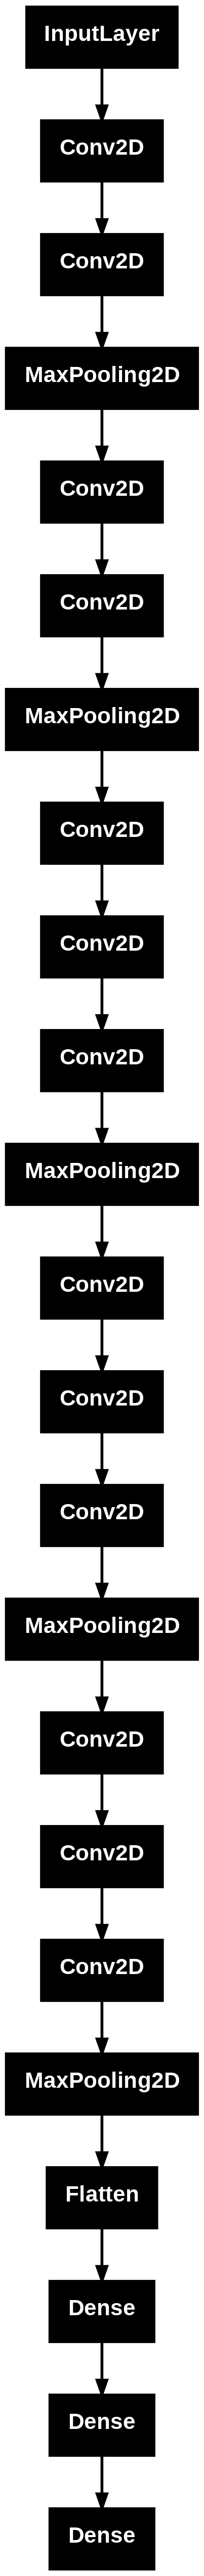

In [6]:
from keras.utils import plot_model
plot_model(model)

In [12]:
for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv'not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [14]:
# retrieve weights from the second hidden layers
filters,bias = model.layers[1].get_weights()

In [15]:
# normalize filter value values 0-1 so  we visvualize them
f_min,f_max = filters.min(),filters.max()
filters = (filters - f_min)/(f_max - f_min)

In [16]:
import matplotlib.pyplot as pyplot

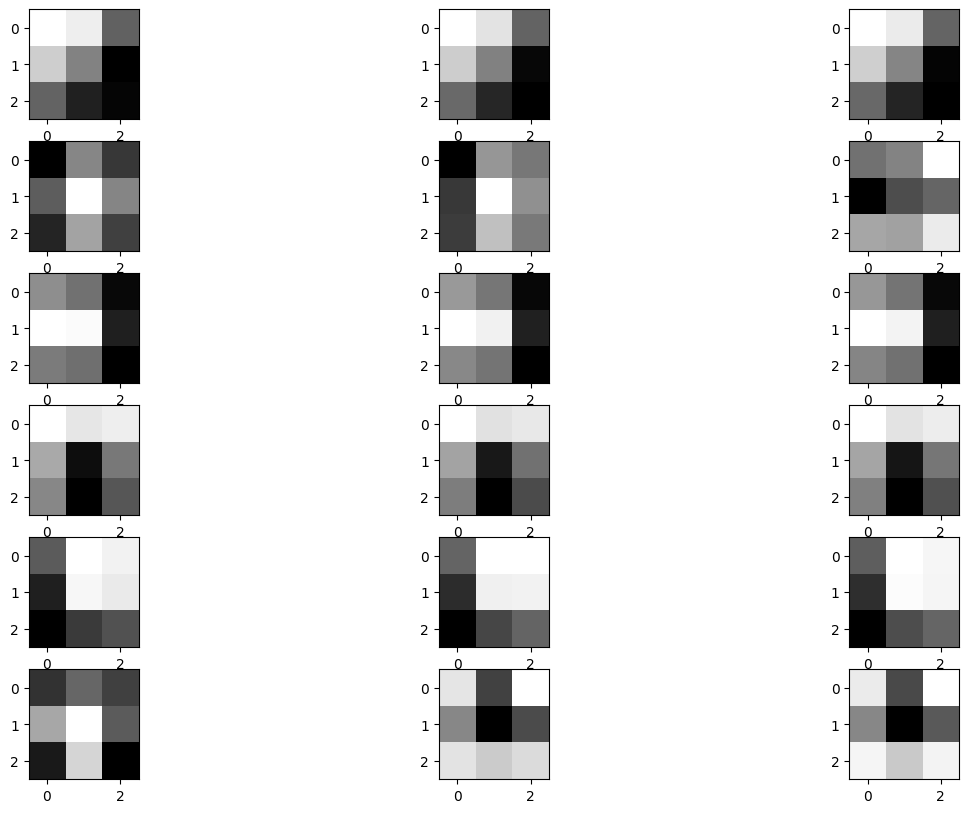

In [24]:
n_filters = 6
ix = 1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
  #get the filters
  f = filters[:,:,:,i]
  for j in range(3):
    #subplot for 6 filters and 3 chanells
    pyplot.subplot(n_filters,3,ix)
    pyplot.imshow(f[:,:,j],cmap='gray')
    ix+=1
#PLOT THE FILTERS
pyplot.show()

In [44]:
model.inputs

[<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor>]

In [25]:
from keras.models import Model

model = Model(inputs=model.inputs,outputs=model.layers[1].output)

In [47]:
import requests
from PIL import Image
import numpy as np
from io import BytesIO

# URL of the image you want to import
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDN_x3qsMAqlbRhBpGwv44hqQphdGCvCQkGD4hTuAww4EhMOVJyT2l55-hj2WMNBfit5ExLhwCdozA9eD-Ae2yCsqtFAoTvzu23yt80uCWrQ&s=10' # Example image URL

# Download the image from the URL
response = requests.get(image_url)
img_data = response.content

# Open the image using Pillow
img = Image.open(BytesIO(img_data))

# Display the image (optional)
# display(img)

# Preprocess the image for your Keras model
# VGG16 expects input images to be 224x224 pixels
img = img.resize((224, 224))

# Convert the image to a NumPy array
# Keras models typically expect a batch dimension, so we add one
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)

print(f"Image shape after preprocessing: {img_array.shape}")
# Now `img_array` is ready to be fed into your model


Image shape after preprocessing: (1, 224, 224, 3)


In [31]:
from PIL import Image
import numpy as np
from io import BytesIO

In [62]:
from keras.src.utils.image_dataset_utils import load_image
image = load_image(
    "/content/image.jpeg",
    image_size=(224, 224),
    num_channels=3, # Assuming an RGB image
    interpolation='bilinear', # A common interpolation method for resizing
    data_format='channels_last' # Standard data format for Keras (height, width, channels)
)

# // convert  the image to Numpy Array
# img = Image.open(BytesIO(image))
# print("img ",img)
# img_array1 = np.array(image)
img_array1 = np.expand_dims(image,axis=0)


In [63]:
print(f"Image shape after preprocessing: {img_array1.shape}")

Image shape after preprocessing: (1, 224, 224, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


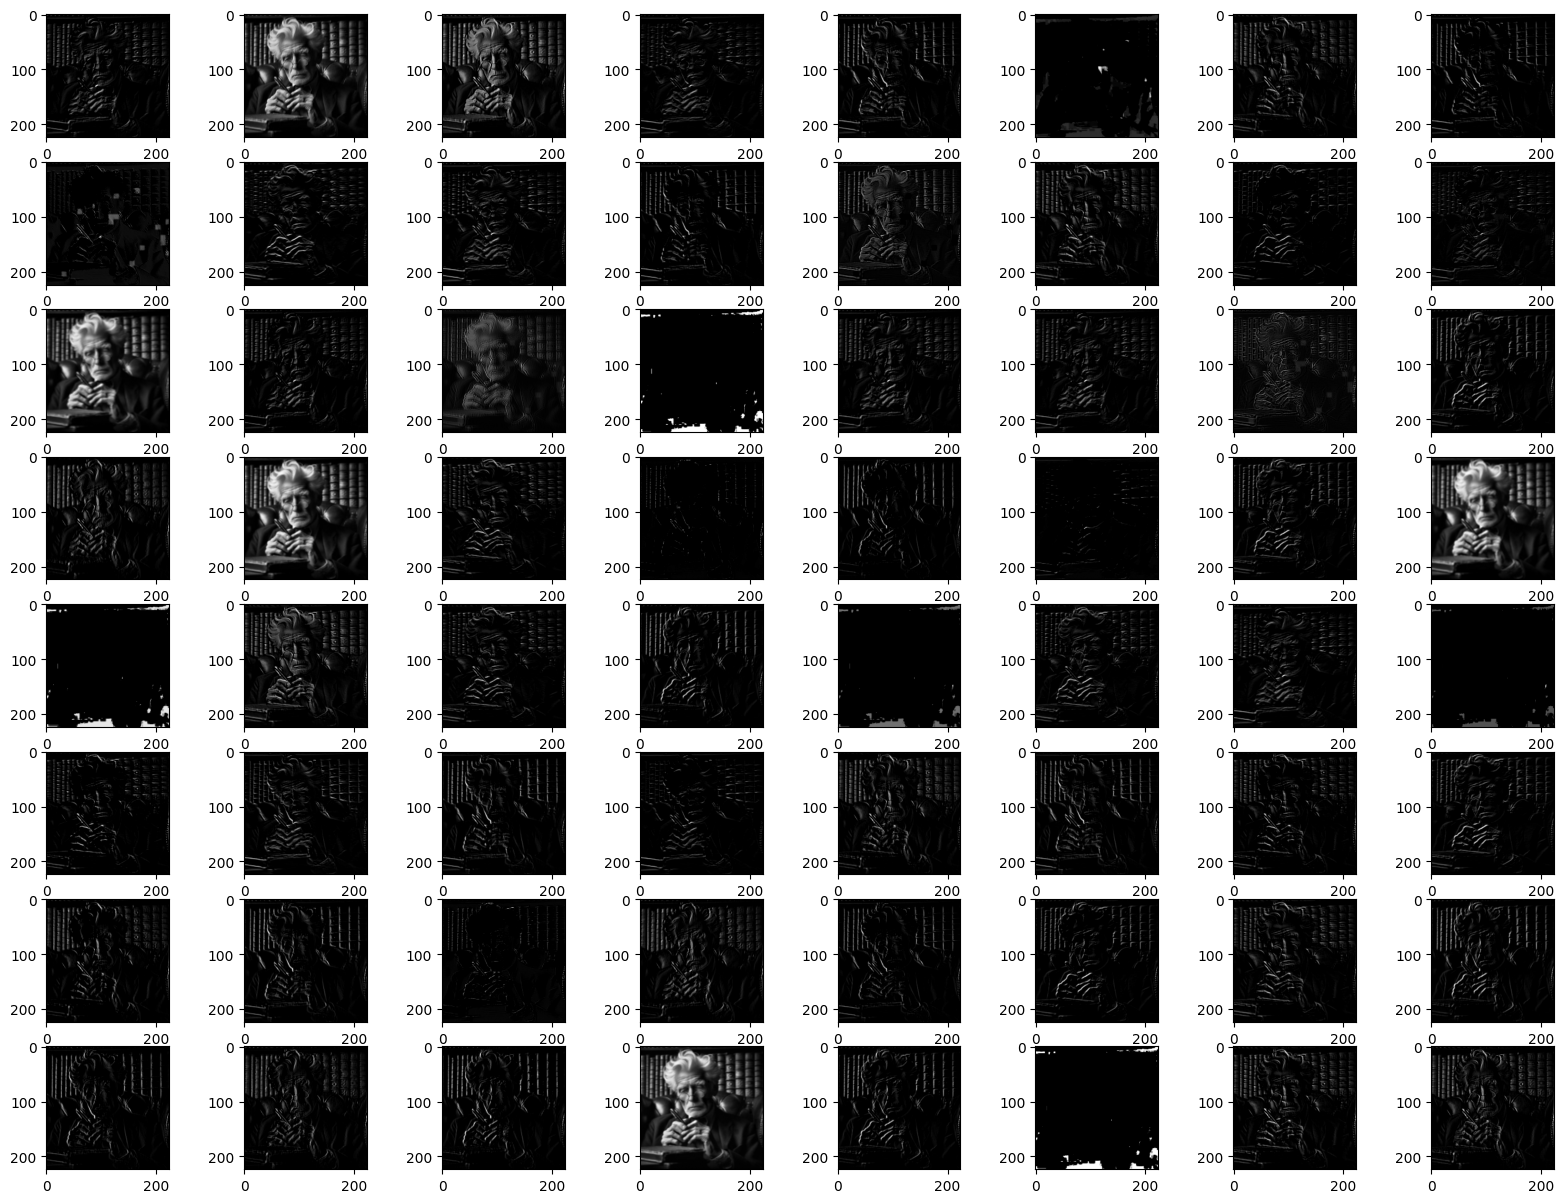

In [64]:
#calculating features_map
features = model.predict(img_array1)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')

pyplot.show()